In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
image_size=[224, 224]
test_data='/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/Test'
train_data='/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/Train'

In [ ]:
model= VGG19(input_shape=image_size+[3], weights='imagenet', include_top=False)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in model.layers:
  layer.trainable= False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/Train/*')

In [ ]:
x = Flatten()(model.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
13/13 [==============================] - 398s 30s/step - loss: 1.6505 - accuracy: 0.4957 - val_loss: 0.6512 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 347s 27s/step - loss: 0.7960 - accuracy: 0.6390 - val_loss: 1.3984 - val_accuracy: 0.4030
Epoch 3/10
13/13 [==============================] - 347s 27s/step - loss: 0.5954 - accuracy: 0.7405 - val_loss: 0.4986 - val_accuracy: 0.7388
Epoch 4/10
13/13 [==============================] - 346s 27s/step - loss: 0.3803 - accuracy: 0.8552 - val_loss: 0.4086 - val_accuracy: 0.8284
Epoch 5/10
13/13 [==============================] - 346s 27s/step - loss: 0.3176 - accuracy: 0.8511 - val_loss: 0.3823 - val_accuracy: 0.8582
Epoch 6/10
13/13 [==============================] - 345s 27s/step - loss: 0.2784 - accuracy: 0.8960 - val_loss: 0.3597 - val_accuracy: 0.8806
Epoch 7/10
13/13 [==============================] - 346s 27s/step - loss: 0.2836 - accuracy: 0.9150 - val_loss: 0.5958 - val_accuracy: 0.6791
Epoch 

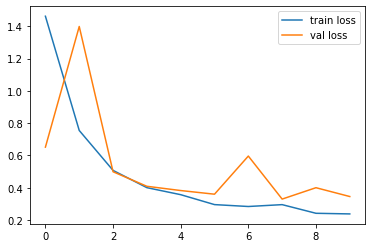

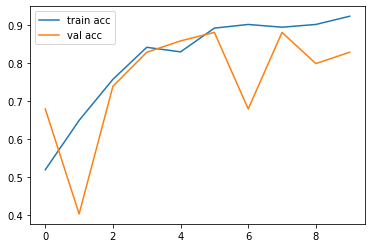

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')